In [1]:
import IPython

In [2]:
from yargy.interpretation import fact as yrg_fact, attribute as yrg_attr
from yargy.pipelines import morph_pipeline as yrg_morph_pipeline
from yargy import rule as yrg_rule, or_ as yrg_r_or
from yargy.predicates import eq as yrg_rp_eq
from yargy import Parser as YrgParser

from ipymarkup import show_span_ascii_markup as natasha_show_markup

In [3]:
def show_matches(rule, *lines):
    parser = YrgParser(rule)
    for line in lines:
        matches = parser.findall(line)  # match() - ?
        matches = sorted(matches, key=lambda _: _.span)
        #m = parser.match(line)
        #matches = [m] if m is not None else []
        spans = [_.span for _ in matches]
        natasha_show_markup(line, spans)
        if matches:
            facts = [_.fact for _ in matches]
            if len(facts) == 1:
                facts = facts[0]
            IPython.display.display(facts)
            for m_i, match in enumerate(matches, start=1):
                print(f"match {m_i} out of {len(matches)}")
                IPython.display.display(match.tree.as_dot)

In [4]:
o_coat = yrg_fact(
    'Coat',
    [
        'gender',
        'season',
    ],
)

In [5]:
a_demiseason = yrg_morph_pipeline([
    'демсезон',
    'демисезон',
    'демисезонный',
]).interpretation(
    o_coat.season.const('демисезонное')
)

a_man = yrg_morph_pipeline([
    'мужской',
    'муж',
    'муж.',
]).interpretation(
    o_coat.gender.const('мужское')
)

a_woman = yrg_morph_pipeline([
    'женский',
    'жен',
    'жен.',
]).interpretation(
    o_coat.gender.const('женское')
)

In [6]:
n_coat = yrg_morph_pipeline([
    'пальто',
    'полупальто',
])

o_adj_variants = yrg_fact('adj_variants', ['value'])

r_coat = yrg_r_or(
    yrg_rule(
        yrg_r_or(a_man, a_woman).optional(),
        a_demiseason.optional(),
        n_coat,
    ).interpretation(o_coat),
    yrg_rule(
        n_coat,
        yrg_r_or(a_man, a_woman).optional(),
        a_demiseason.optional(),
    ).interpretation(o_coat),
).interpretation(o_adj_variants.value)

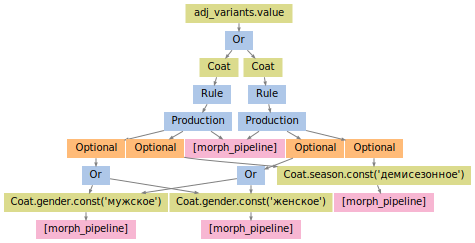

In [7]:
IPython.display.display(r_coat.as_dot)

пальто
──────


Coat(
    gender=None,
    season=None
)

match 1 out of 1


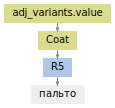

несколько пальто
          ──────


Coat(
    gender=None,
    season=None
)

match 1 out of 1


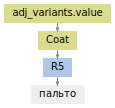

мужское полупальто
──────────────────


Coat(
    gender='мужское',
    season=None
)

match 1 out of 1


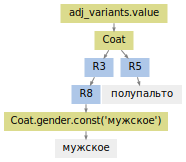

продаю жен. демисезонное пальто
       ────────────────────────


Coat(
    gender='женское',
    season='демисезонное'
)

match 1 out of 1


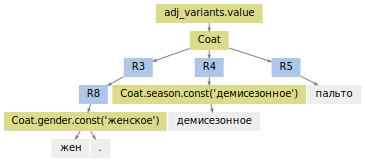

мужской пальто
──────────────


Coat(
    gender='мужское',
    season=None
)

match 1 out of 1


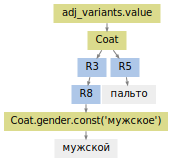

мужская куртка
пальто мужское
──────────────


Coat(
    gender='мужское',
    season=None
)

match 1 out of 1


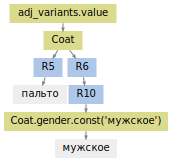

пальто демисезонное муж.
───────────────────     


Coat(
    gender=None,
    season='демисезонное'
)

match 1 out of 1


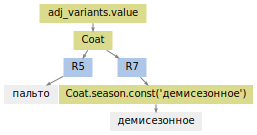

In [8]:
show_matches(
    r_coat,
    'пальто',
    'несколько пальто',
    'мужское полупальто',
    'продаю жен. демисезонное пальто',
    'мужской пальто',
    'мужская куртка',
    'пальто мужское',
    'пальто демисезонное муж.',
)